In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

from sklearn import tree

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer


In [3]:
import pandas as pd
df = pd.read_excel("data.xls")
li = df[df.isnull().T.any()].index
for i in li:
    df.drop(index=i,axis = 1,inplace = True)
df[df.isnull().T.any()]

,tweet,polarity,subjectivity,vader_neg,vader_neu,vader_pos,vader_compound


In [4]:
df['polarity_new']=5
df.loc[df['polarity']==0,['polarity_new']]=0
df.loc[df['polarity']>0,['polarity_new']]=1
df.loc[df['polarity']<0,['polarity_new']]=-1
df['polarity_new'].value_counts()

 1    3461
 0    3369
-1     827
Name: polarity_new, dtype: int64

In [5]:
X = df['tweet']
Y = df['polarity_new']

In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def custom_preprocessor(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('@[^\s]+','',text)
    text = re.sub(r'\B#\S+','',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    words = word_tokenize(text)
    words = [i for i in words if i not in stopwords.words()]
    text = ' '.join(words)
    
    return text

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
X_train.shape

(6125,)

In [8]:
vect = CountVectorizer(ngram_range=(1,2),max_features=1500)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1532x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 22368 stored elements in Compressed Sparse Row format>

In [9]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
clf.fit(X_train_dtm,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [10]:
from sklearn.metrics import classification_report
y_test_pred = clf.predict(X_test_dtm)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:{}".format(accuracy_score(y_test, y_test_pred)))
print("Precision:{}".format(precision_score(y_test, y_test_pred,average='micro')))
print("Recall:{}".format(recall_score(y_test, y_test_pred,average='micro')))
print(classification_report(y_test,y_test_pred))

Accuracy:0.6847258485639687
Precision:0.6847258485639687
Recall:0.6847258485639687
              precision    recall  f1-score   support

          -1       0.49      0.11      0.18       161
           0       0.60      1.00      0.75       673
           1       0.97      0.51      0.67       698

    accuracy                           0.68      1532
   macro avg       0.68      0.54      0.53      1532
weighted avg       0.75      0.68      0.65      1532



In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train_dtm, y_train)
    train_scores.append(rf.score(X_train_dtm, y_train))
    test_scores.append(rf.score(X_test_dtm, y_test))

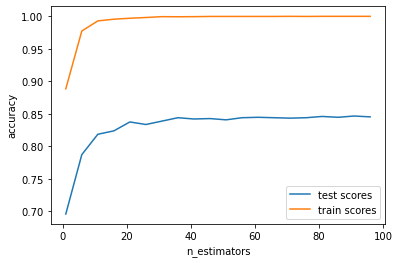

In [13]:
import matplotlib.pyplot as plt
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [14]:
rf = RandomForestClassifier(random_state=0, n_estimators=100)
rf.fit(X_train_dtm, y_train)
rf.score(X_test_dtm, y_test)

0.8459530026109661

In [15]:
from sklearn.metrics import classification_report
y_test_pred = rf.predict(X_test_dtm)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:{}".format(accuracy_score(y_test, y_test_pred)))
print("Precision:{}".format(precision_score(y_test, y_test_pred,average='micro')))
print("Recall:{}".format(recall_score(y_test, y_test_pred,average='micro')))
print(classification_report(y_test,y_test_pred))

Accuracy:0.8459530026109661
Precision:0.8459530026109661
Recall:0.8459530026109661
              precision    recall  f1-score   support

          -1       0.85      0.40      0.54       161
           0       0.79      0.96      0.87       673
           1       0.91      0.84      0.87       698

    accuracy                           0.85      1532
   macro avg       0.85      0.73      0.76      1532
weighted avg       0.85      0.85      0.84      1532



In [16]:
import numpy as np
df1 = pd.read_csv('Finished_vaccination_tweets_手动标记.csv',encoding='ISO-8859-1')
df1 = df1[(df1['code-attitude'] == '0') | (df1['code-attitude'] == '1') | (df1['code-attitude'] == '-1')]
df1['text']

2       Facts are immutable, Senator, even when you're...
3       Explain to me again why we need a vaccine @Bor...
4       Does anyone have any useful advice/guidance fo...
5       it is a bit sad to claim the fame for success ...
6       There have not been many bright days in 2020 b...
                              ...                        
3101    #PublicHealth #COVID19 #Modernavaccine #Modern...
3102    @crashoverrideee #COVID19 Vaccine Update for #...
3103    Dr Fun's I Feel Good - My effort at a PSA, ple...
3104    @Writer_DG I got dose #2 Friday. Have to admit...
3105    Feeling very privileged to have had my first c...
Name: text, Length: 247, dtype: object

In [17]:
df1['text'] = pd.DataFrame(df1['text'].astype(str))
df1['text_clean']=df1['text'].apply(custom_preprocessor)
t = vect.transform(df1['text'])
y_test_pred = rf.predict(t)
df1['code-attitude'] = pd.DataFrame(df1['code-attitude'].astype(int))
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:{}".format(accuracy_score(df1['code-attitude'], y_test_pred)))
print(classification_report(df1['code-attitude'],y_test_pred))

Accuracy:0.5344129554655871
              precision    recall  f1-score   support

          -1       0.52      0.26      0.34        58
           0       0.56      0.60      0.58       113
           1       0.51      0.64      0.57        76

    accuracy                           0.53       247
   macro avg       0.53      0.50      0.50       247
weighted avg       0.53      0.53      0.52       247

